In [1]:
import numpy as np
from numpy import hstack,array

from keras.models import Sequential
from keras.layers import LSTM,Bidirectional
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error

/home/ganesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Merchant Data
def load_dataset():
    df = pd.read_csv("subway",index_col=0,header=None,names=["i","count"])
    X_subway = list(df['count'].values)
    X_subway,y_subway = split_sequence(X_subway,n_steps)
    return X_subway,y_subway
# plt.plot(X_subway)
# X_subway[:2],y_subway[:2]

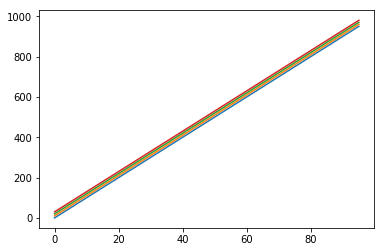

In [4]:
n_steps = 4
ts = [i*10 for i in range(100)]
X,y = split_sequence(ts,n_steps)
X[:2],y[:2]
plt.plot(X)

In [5]:
'''
I.Vanilla LSTMs
'''

'\nI.Vanilla LSTMs\n'

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X[:2]

array([[[ 0],
        [10],
        [20],
        [30]],

       [[10],
        [20],
        [30],
        [40]]])

In [7]:
X_subway,y_subway = load_dataset()
n_features = 1
n_steps = 4
X_subway = X_subway.reshape((X_subway.shape[0], X_subway.shape[1], n_features))
X_subway[:2]

array([[[ 678.],
        [1407.],
        [1502.],
        [1498.]],

       [[1407.],
        [1502.],
        [1498.],
        [1538.]]])

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
# fit model
model.fit(X_subway, y_subway, epochs=80, verbose=1)

Epoch 1/80
518/518 [==============================] - 2s 4ms/step - loss: 3231415.2317
Epoch 2/80
518/518 [==============================] - 0s 520us/step - loss: 2775700.6573 0s - loss: 2804612.48
Epoch 3/80
518/518 [==============================] - 0s 478us/step - loss: 2387599.4681
Epoch 4/80
518/518 [==============================] - 0s 576us/step - loss: 1852193.2799
Epoch 5/80
518/518 [==============================] - 0s 446us/step - loss: 1134943.3392
Epoch 6/80
518/518 [==============================] - 0s 515us/step - loss: 213656.6015
Epoch 7/80
518/518 [==============================] - 0s 413us/step - loss: 75038.9268
Epoch 8/80
518/518 [==============================] - 0s 493us/step - loss: 84305.9329
Epoch 9/80
518/518 [==============================] - 0s 588us/step - loss: 74835.6676
Epoch 10/80
518/518 [==============================] - 0s 702us/step - loss: 63433.4129
Epoch 11/80
518/518 [==============================] - 0s 613us/step - loss: 57514.2818
Epoch 12/8

In [208]:
test = array([80,90,100,110])
test = test.reshape(1,n_steps,n_features)
model.predict(test)

ValueError: cannot reshape array of size 4 into shape (1,2,1)

In [202]:
y_pred = model.predict(X_subway)
mean_squared_error(y_subway,y_pred.reshape((520,)))

77426.90074126371

In [ ]:
'''
Stacked LSTMs
'''

In [161]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [162]:
# fit model
# model.fit(X, y, epochs=1200, verbose=1)
# fit model
model.fit(X_subway, y_subway, epochs=800, verbose=1)

Epoch 1/800
518/518 [==============================] - 7s 14ms/step - loss: 1613543.7321
Epoch 2/800
518/518 [==============================] - 0s 621us/step - loss: 849007.6114
Epoch 3/800
518/518 [==============================] - 0s 613us/step - loss: 178003.7598
Epoch 4/800
518/518 [==============================] - 0s 542us/step - loss: 105772.1586
Epoch 5/800
518/518 [==============================] - 0s 545us/step - loss: 84705.0487
Epoch 6/800
518/518 [==============================] - 0s 517us/step - loss: 73024.1040
Epoch 7/800
518/518 [==============================] - 0s 479us/step - loss: 69489.3874
Epoch 8/800
518/518 [==============================] - 0s 438us/step - loss: 78291.8550
Epoch 9/800
518/518 [==============================] - 0s 515us/step - loss: 90311.0415
Epoch 10/800
518/518 [==============================] - 0s 511us/step - loss: 85258.0409
Epoch 11/800
518/518 [==============================] - 0s 493us/step - loss: 80878.4221
Epoch 12/800
518/518 [====

518/518 [==============================] - 0s 449us/step - loss: 35993.7557
Epoch 184/800
518/518 [==============================] - 0s 471us/step - loss: 39084.4139
Epoch 185/800
518/518 [==============================] - 0s 681us/step - loss: 36617.6678
Epoch 186/800
518/518 [==============================] - 0s 542us/step - loss: 39640.6673
Epoch 187/800
518/518 [==============================] - 0s 426us/step - loss: 39462.2497
Epoch 188/800
518/518 [==============================] - 0s 467us/step - loss: 34313.3342
Epoch 189/800
518/518 [==============================] - 0s 503us/step - loss: 36370.5925
Epoch 190/800
518/518 [==============================] - 0s 520us/step - loss: 39005.1274
Epoch 191/800
518/518 [==============================] - 0s 562us/step - loss: 40573.8711
Epoch 192/800
518/518 [==============================] - 0s 441us/step - loss: 35187.3489
Epoch 193/800
518/518 [==============================] - 0s 471us/step - loss: 40573.2011
Epoch 194/800
518/518 [=

Epoch 274/800
518/518 [==============================] - 0s 414us/step - loss: 35723.9187
Epoch 275/800
518/518 [==============================] - 0s 450us/step - loss: 34978.5289
Epoch 276/800
518/518 [==============================] - 0s 426us/step - loss: 33649.6488
Epoch 277/800
518/518 [==============================] - 0s 419us/step - loss: 33484.5453
Epoch 278/800
518/518 [==============================] - 0s 498us/step - loss: 35053.5347
Epoch 279/800
518/518 [==============================] - 0s 439us/step - loss: 34641.0771
Epoch 280/800
518/518 [==============================] - 0s 676us/step - loss: 33638.1453
Epoch 281/800
518/518 [==============================] - 0s 373us/step - loss: 32694.3535
Epoch 282/800
518/518 [==============================] - 0s 461us/step - loss: 33760.1730
Epoch 283/800
518/518 [==============================] - 0s 396us/step - loss: 34232.5707
Epoch 284/800
518/518 [==============================] - 0s 389us/step - loss: 32583.5151
Epoch 285/

518/518 [==============================] - 0s 395us/step - loss: 38268.3188
Epoch 455/800
518/518 [==============================] - 0s 445us/step - loss: 43412.9775
Epoch 456/800
518/518 [==============================] - 0s 398us/step - loss: 38870.3918
Epoch 457/800
518/518 [==============================] - 0s 419us/step - loss: 38067.6807
Epoch 458/800
518/518 [==============================] - 0s 459us/step - loss: 37973.6999
Epoch 459/800
518/518 [==============================] - 0s 457us/step - loss: 37473.5821
Epoch 460/800
518/518 [==============================] - 0s 449us/step - loss: 35700.0295
Epoch 461/800
518/518 [==============================] - 0s 394us/step - loss: 34567.0218
Epoch 462/800
518/518 [==============================] - 0s 454us/step - loss: 32519.0812
Epoch 463/800
518/518 [==============================] - 0s 432us/step - loss: 32686.3755
Epoch 464/800
518/518 [==============================] - 0s 427us/step - loss: 32092.7541
Epoch 465/800
518/518 [=

518/518 [==============================] - 0s 455us/step - loss: 30789.7582
Epoch 637/800
518/518 [==============================] - 0s 424us/step - loss: 32374.9927
Epoch 638/800
518/518 [==============================] - 0s 462us/step - loss: 31543.7825
Epoch 639/800
518/518 [==============================] - 0s 446us/step - loss: 31683.7857
Epoch 640/800
518/518 [==============================] - 0s 450us/step - loss: 30636.9880
Epoch 641/800
518/518 [==============================] - 0s 438us/step - loss: 30223.9795
Epoch 642/800
518/518 [==============================] - 0s 400us/step - loss: 30746.9177
Epoch 643/800
518/518 [==============================] - 0s 440us/step - loss: 32025.5257
Epoch 644/800
518/518 [==============================] - 0s 621us/step - loss: 30638.6079 0s - loss: 34780.
Epoch 645/800
518/518 [==============================] - 0s 494us/step - loss: 30967.5345
Epoch 646/800
518/518 [==============================] - 0s 425us/step - loss: 29962.3782
Epoch 

Epoch 727/800
518/518 [==============================] - 0s 493us/step - loss: 29021.1562
Epoch 728/800
518/518 [==============================] - 0s 393us/step - loss: 30573.6188
Epoch 729/800
518/518 [==============================] - 0s 426us/step - loss: 29070.3028
Epoch 730/800
518/518 [==============================] - 0s 439us/step - loss: 28785.1613
Epoch 731/800
518/518 [==============================] - 0s 419us/step - loss: 29703.2862
Epoch 732/800
518/518 [==============================] - 0s 424us/step - loss: 29021.5550
Epoch 733/800
518/518 [==============================] - 0s 401us/step - loss: 30504.5590
Epoch 734/800
518/518 [==============================] - 0s 414us/step - loss: 31392.3579
Epoch 735/800
518/518 [==============================] - 0s 437us/step - loss: 29236.5918
Epoch 736/800
518/518 [==============================] - 0s 408us/step - loss: 28987.1332
Epoch 737/800
518/518 [==============================] - 0s 655us/step - loss: 29044.4096
Epoch 738/

In [10]:
test = array([80,90,100,110])
test = test.reshape(1,n_steps,n_features)
model.predict(test)

array([[118.30674]], dtype=float32)

In [11]:
# y_pred = model.predict(X)
# mean_squared_error(y,y_pred.reshape((96,)))
y_pred = model.predict(X_subway)
mean_squared_error(y_subway,y_pred.reshape((518,)))

33541.84218728936

In [12]:
'''
Bidirectional LSTMs
'''

'\nBidirectional LSTMs\n'

In [13]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(X,y,epochs=1200,verbose=1)

Epoch 1/1200
96/96 [==============================] - 2s 23ms/step - loss: 296957.1146
Epoch 2/1200
96/96 [==============================] - 0s 610us/step - loss: 222135.1042
Epoch 3/1200
96/96 [==============================] - 0s 682us/step - loss: 187091.2240
Epoch 4/1200
96/96 [==============================] - 0s 645us/step - loss: 170482.4635
Epoch 5/1200
96/96 [==============================] - 0s 631us/step - loss: 155651.3854
Epoch 6/1200
96/96 [==============================] - 0s 596us/step - loss: 142544.8125
Epoch 7/1200
96/96 [==============================] - 0s 685us/step - loss: 128007.3620
Epoch 8/1200
96/96 [==============================] - 0s 783us/step - loss: 114735.1484
Epoch 9/1200
96/96 [==============================] - 0s 882us/step - loss: 100675.4844
Epoch 10/1200
96/96 [==============================] - 0s 798us/step - loss: 78464.7292
Epoch 11/1200
96/96 [==============================] - 0s 692us/step - loss: 44986.4245
Epoch 12/1200
96/96 [============

96/96 [==============================] - 0s 430us/step - loss: 0.3647
Epoch 98/1200
96/96 [==============================] - 0s 441us/step - loss: 0.4034
Epoch 99/1200
96/96 [==============================] - 0s 738us/step - loss: 0.3632
Epoch 100/1200
96/96 [==============================] - 0s 494us/step - loss: 0.3608
Epoch 101/1200
96/96 [==============================] - 0s 530us/step - loss: 0.3248
Epoch 102/1200
96/96 [==============================] - 0s 554us/step - loss: 0.3306
Epoch 103/1200
96/96 [==============================] - 0s 492us/step - loss: 0.2872
Epoch 104/1200
96/96 [==============================] - 0s 399us/step - loss: 0.3542
Epoch 105/1200
96/96 [==============================] - 0s 514us/step - loss: 0.2932
Epoch 106/1200
96/96 [==============================] - 0s 440us/step - loss: 0.2678
Epoch 107/1200
96/96 [==============================] - 0s 629us/step - loss: 0.3102
Epoch 108/1200
96/96 [==============================] - 0s 475us/step - loss: 0.24

96/96 [==============================] - 0s 417us/step - loss: 0.0630
Epoch 194/1200
96/96 [==============================] - 0s 402us/step - loss: 0.0767
Epoch 195/1200
96/96 [==============================] - 0s 406us/step - loss: 0.0814
Epoch 196/1200
96/96 [==============================] - 0s 358us/step - loss: 0.0671
Epoch 197/1200
96/96 [==============================] - 0s 453us/step - loss: 0.0759
Epoch 198/1200
96/96 [==============================] - 0s 347us/step - loss: 0.0740
Epoch 199/1200
96/96 [==============================] - 0s 490us/step - loss: 0.0774
Epoch 200/1200
96/96 [==============================] - 0s 396us/step - loss: 0.0867
Epoch 201/1200
96/96 [==============================] - 0s 447us/step - loss: 0.0788
Epoch 202/1200
96/96 [==============================] - 0s 264us/step - loss: 0.0631
Epoch 203/1200
96/96 [==============================] - 0s 516us/step - loss: 0.0509
Epoch 204/1200
96/96 [==============================] - 0s 258us/step - loss: 0.

96/96 [==============================] - 0s 341us/step - loss: 0.0384
Epoch 290/1200
96/96 [==============================] - 0s 549us/step - loss: 0.0381
Epoch 291/1200
96/96 [==============================] - 0s 417us/step - loss: 0.0362
Epoch 292/1200
96/96 [==============================] - 0s 877us/step - loss: 0.0326
Epoch 293/1200
96/96 [==============================] - 0s 315us/step - loss: 0.0322
Epoch 294/1200
96/96 [==============================] - 0s 315us/step - loss: 0.0297
Epoch 295/1200
96/96 [==============================] - 0s 389us/step - loss: 0.0303
Epoch 296/1200
96/96 [==============================] - 0s 296us/step - loss: 0.0369
Epoch 297/1200
96/96 [==============================] - 0s 407us/step - loss: 0.0354
Epoch 298/1200
96/96 [==============================] - 0s 457us/step - loss: 0.0347
Epoch 299/1200
96/96 [==============================] - 0s 405us/step - loss: 0.0379
Epoch 300/1200
96/96 [==============================] - 0s 429us/step - loss: 0.

96/96 [==============================] - 0s 417us/step - loss: 0.0313
Epoch 386/1200
96/96 [==============================] - 0s 326us/step - loss: 0.0315
Epoch 387/1200
96/96 [==============================] - 0s 399us/step - loss: 0.0475
Epoch 388/1200
96/96 [==============================] - 0s 303us/step - loss: 0.0295
Epoch 389/1200
96/96 [==============================] - 0s 381us/step - loss: 0.0300
Epoch 390/1200
96/96 [==============================] - 0s 483us/step - loss: 0.0373
Epoch 391/1200
96/96 [==============================] - 0s 301us/step - loss: 0.0213
Epoch 392/1200
96/96 [==============================] - 0s 571us/step - loss: 0.0218
Epoch 393/1200
96/96 [==============================] - 0s 554us/step - loss: 0.0275
Epoch 394/1200
96/96 [==============================] - 0s 453us/step - loss: 0.0234
Epoch 395/1200
96/96 [==============================] - 0s 569us/step - loss: 0.0233
Epoch 396/1200
96/96 [==============================] - 0s 348us/step - loss: 0.

96/96 [==============================] - 0s 391us/step - loss: 0.0754
Epoch 482/1200
96/96 [==============================] - 0s 550us/step - loss: 0.0948
Epoch 483/1200
96/96 [==============================] - 0s 341us/step - loss: 0.0760
Epoch 484/1200
96/96 [==============================] - 0s 352us/step - loss: 0.0697
Epoch 485/1200
96/96 [==============================] - 0s 301us/step - loss: 0.0813
Epoch 486/1200
96/96 [==============================] - 0s 391us/step - loss: 0.0896
Epoch 487/1200
96/96 [==============================] - 0s 335us/step - loss: 0.0661
Epoch 488/1200
96/96 [==============================] - 0s 425us/step - loss: 0.0500
Epoch 489/1200
96/96 [==============================] - 0s 408us/step - loss: 0.0324
Epoch 490/1200
96/96 [==============================] - 0s 483us/step - loss: 0.0450
Epoch 491/1200
96/96 [==============================] - 0s 404us/step - loss: 0.0301
Epoch 492/1200
96/96 [==============================] - 0s 456us/step - loss: 0.

96/96 [==============================] - 0s 249us/step - loss: 0.0193
Epoch 578/1200
96/96 [==============================] - 0s 380us/step - loss: 0.0185
Epoch 579/1200
96/96 [==============================] - 0s 553us/step - loss: 0.0163
Epoch 580/1200
96/96 [==============================] - 0s 370us/step - loss: 0.0149
Epoch 581/1200
96/96 [==============================] - 0s 653us/step - loss: 0.0187
Epoch 582/1200
96/96 [==============================] - 0s 324us/step - loss: 0.0157
Epoch 583/1200
96/96 [==============================] - 0s 422us/step - loss: 0.0202
Epoch 584/1200
96/96 [==============================] - 0s 423us/step - loss: 0.0142
Epoch 585/1200
96/96 [==============================] - 0s 404us/step - loss: 0.0162
Epoch 586/1200
96/96 [==============================] - 0s 386us/step - loss: 0.0238
Epoch 587/1200
96/96 [==============================] - 0s 619us/step - loss: 0.0423
Epoch 588/1200
96/96 [==============================] - 0s 384us/step - loss: 0.

96/96 [==============================] - 0s 388us/step - loss: 0.0175
Epoch 674/1200
96/96 [==============================] - 0s 328us/step - loss: 0.0270
Epoch 675/1200
96/96 [==============================] - 0s 552us/step - loss: 0.0199
Epoch 676/1200
96/96 [==============================] - 0s 366us/step - loss: 0.0286
Epoch 677/1200
96/96 [==============================] - 0s 287us/step - loss: 0.0287
Epoch 678/1200
96/96 [==============================] - 0s 247us/step - loss: 0.0183
Epoch 679/1200
96/96 [==============================] - 0s 434us/step - loss: 0.0178
Epoch 680/1200
96/96 [==============================] - 0s 845us/step - loss: 0.0215
Epoch 681/1200
96/96 [==============================] - 0s 531us/step - loss: 0.0238
Epoch 682/1200
96/96 [==============================] - 0s 385us/step - loss: 0.0241
Epoch 683/1200
96/96 [==============================] - 0s 517us/step - loss: 0.0190
Epoch 684/1200
96/96 [==============================] - 0s 275us/step - loss: 0.

96/96 [==============================] - 0s 794us/step - loss: 0.0241
Epoch 770/1200
96/96 [==============================] - 0s 679us/step - loss: 0.0189
Epoch 771/1200
96/96 [==============================] - 0s 414us/step - loss: 0.0152
Epoch 772/1200
96/96 [==============================] - 0s 588us/step - loss: 0.0137
Epoch 773/1200
96/96 [==============================] - 0s 249us/step - loss: 0.0136
Epoch 774/1200
96/96 [==============================] - 0s 303us/step - loss: 0.0135
Epoch 775/1200
96/96 [==============================] - 0s 248us/step - loss: 0.0122
Epoch 776/1200
96/96 [==============================] - 0s 354us/step - loss: 0.0121
Epoch 777/1200
96/96 [==============================] - 0s 987us/step - loss: 0.0172
Epoch 778/1200
96/96 [==============================] - 0s 465us/step - loss: 0.0131
Epoch 779/1200
96/96 [==============================] - 0s 364us/step - loss: 0.0120
Epoch 780/1200
96/96 [==============================] - 0s 646us/step - loss: 0.

96/96 [==============================] - 0s 606us/step - loss: 0.0153
Epoch 866/1200
96/96 [==============================] - 0s 400us/step - loss: 0.0149
Epoch 867/1200
96/96 [==============================] - 0s 492us/step - loss: 0.0163
Epoch 868/1200
96/96 [==============================] - 0s 288us/step - loss: 0.0119
Epoch 869/1200
96/96 [==============================] - 0s 443us/step - loss: 0.0114
Epoch 870/1200
96/96 [==============================] - 0s 391us/step - loss: 0.0218
Epoch 871/1200
96/96 [==============================] - 0s 400us/step - loss: 0.0170
Epoch 872/1200
96/96 [==============================] - 0s 425us/step - loss: 0.0151
Epoch 873/1200
96/96 [==============================] - 0s 364us/step - loss: 0.0116
Epoch 874/1200
96/96 [==============================] - 0s 390us/step - loss: 0.0198
Epoch 875/1200
96/96 [==============================] - 0s 434us/step - loss: 0.0320
Epoch 876/1200
96/96 [==============================] - 0s 354us/step - loss: 0.

96/96 [==============================] - 0s 395us/step - loss: 0.0172
Epoch 962/1200
96/96 [==============================] - 0s 439us/step - loss: 0.0170
Epoch 963/1200
96/96 [==============================] - 0s 459us/step - loss: 0.0150
Epoch 964/1200
96/96 [==============================] - 0s 542us/step - loss: 0.0167
Epoch 965/1200
96/96 [==============================] - 0s 541us/step - loss: 0.0189
Epoch 966/1200
96/96 [==============================] - 0s 310us/step - loss: 0.0216
Epoch 967/1200
96/96 [==============================] - 0s 263us/step - loss: 0.0166
Epoch 968/1200
96/96 [==============================] - 0s 229us/step - loss: 0.0107
Epoch 969/1200
96/96 [==============================] - 0s 476us/step - loss: 0.0102
Epoch 970/1200
96/96 [==============================] - 0s 297us/step - loss: 0.0205
Epoch 971/1200
96/96 [==============================] - 0s 406us/step - loss: 0.0278
Epoch 972/1200
96/96 [==============================] - 0s 425us/step - loss: 0.

96/96 [==============================] - 0s 533us/step - loss: 0.0432
Epoch 1057/1200
96/96 [==============================] - 0s 371us/step - loss: 0.0479
Epoch 1058/1200
96/96 [==============================] - 0s 360us/step - loss: 0.0375
Epoch 1059/1200
96/96 [==============================] - 0s 550us/step - loss: 0.0445
Epoch 1060/1200
96/96 [==============================] - 0s 321us/step - loss: 0.0395
Epoch 1061/1200
96/96 [==============================] - 0s 386us/step - loss: 0.0574
Epoch 1062/1200
96/96 [==============================] - 0s 689us/step - loss: 0.0879
Epoch 1063/1200
96/96 [==============================] - 0s 348us/step - loss: 0.0533
Epoch 1064/1200
96/96 [==============================] - 0s 397us/step - loss: 0.0561
Epoch 1065/1200
96/96 [==============================] - 0s 314us/step - loss: 0.0466
Epoch 1066/1200
96/96 [==============================] - 0s 508us/step - loss: 0.0637
Epoch 1067/1200
96/96 [==============================] - 0s 318us/step

96/96 [==============================] - 0s 457us/step - loss: 0.1313
Epoch 1152/1200
96/96 [==============================] - 0s 478us/step - loss: 0.2932
Epoch 1153/1200
96/96 [==============================] - 0s 412us/step - loss: 0.3069
Epoch 1154/1200
96/96 [==============================] - 0s 679us/step - loss: 0.3209
Epoch 1155/1200
96/96 [==============================] - 0s 415us/step - loss: 0.2222
Epoch 1156/1200
96/96 [==============================] - 0s 397us/step - loss: 0.2280
Epoch 1157/1200
96/96 [==============================] - 0s 909us/step - loss: 0.5430
Epoch 1158/1200
96/96 [==============================] - 0s 467us/step - loss: 0.2972
Epoch 1159/1200
96/96 [==============================] - 0s 447us/step - loss: 0.3460
Epoch 1160/1200
96/96 [==============================] - 0s 466us/step - loss: 0.3852
Epoch 1161/1200
96/96 [==============================] - 0s 681us/step - loss: 0.1737
Epoch 1162/1200
96/96 [==============================] - 0s 434us/step

In [15]:
test = array([80,90,100,110])
test = test.reshape(1,n_steps,n_features)
model.predict(test)

array([[119.94235]], dtype=float32)

In [16]:
y_pred = model.predict(X)
mean_squared_error(y,y_pred.reshape((96,)))

0.013506847663696439

In [17]:
'''
CNN-LSTM
'''

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
X_subway = X_subway.reshape((X_subway.shape[0], n_seq, n_steps, n_features))

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(64, 1, activation='relu'), input_shape=(None, n_steps,n_features)))
model.add(TimeDistributed(MaxPooling1D()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [ ]:
# fit model
model.fit(X_subway, y_subway, epochs=800, verbose=1)

Epoch 1/800
518/518 [==============================] - 2s 4ms/step - loss: 2145821.6332
Epoch 2/800
518/518 [==============================] - 0s 461us/step - loss: 1888352.4846
Epoch 3/800
518/518 [==============================] - 0s 279us/step - loss: 1550312.0159
Epoch 4/800
518/518 [==============================] - 0s 331us/step - loss: 937506.1088
Epoch 5/800
518/518 [==============================] - 0s 498us/step - loss: 533570.0366
Epoch 6/800
518/518 [==============================] - 0s 313us/step - loss: 249314.7594
Epoch 7/800
518/518 [==============================] - 0s 296us/step - loss: 118547.6771
Epoch 8/800
518/518 [==============================] - 0s 383us/step - loss: 87121.6403
Epoch 9/800
518/518 [==============================] - 0s 438us/step - loss: 87726.2917
Epoch 10/800
518/518 [==============================] - 0s 355us/step - loss: 87123.7735
Epoch 11/800
518/518 [==============================] - 0s 381us/step - loss: 87164.3673
Epoch 12/800
518/518 [

518/518 [==============================] - 0s 204us/step - loss: 86994.7446
Epoch 94/800
518/518 [==============================] - 0s 196us/step - loss: 88528.8843
Epoch 95/800
518/518 [==============================] - 0s 198us/step - loss: 87486.1361
Epoch 96/800
518/518 [==============================] - 0s 248us/step - loss: 87034.4084
Epoch 97/800
518/518 [==============================] - 0s 241us/step - loss: 86941.4053
Epoch 98/800
518/518 [==============================] - 0s 208us/step - loss: 87251.1784
Epoch 99/800
518/518 [==============================] - 0s 154us/step - loss: 86905.9382
Epoch 100/800
518/518 [==============================] - 0s 198us/step - loss: 86742.2821
Epoch 101/800
518/518 [==============================] - 0s 182us/step - loss: 86863.1378
Epoch 102/800
518/518 [==============================] - 0s 259us/step - loss: 87067.5137
Epoch 103/800
518/518 [==============================] - 0s 198us/step - loss: 86997.0337
Epoch 104/800
518/518 [=======

518/518 [==============================] - 0s 274us/step - loss: 86797.0650
Epoch 185/800
518/518 [==============================] - 0s 195us/step - loss: 86886.5412
Epoch 186/800
518/518 [==============================] - 0s 196us/step - loss: 86759.8449
Epoch 187/800
518/518 [==============================] - 0s 179us/step - loss: 87622.3572
Epoch 188/800
518/518 [==============================] - 0s 215us/step - loss: 86736.9066
Epoch 189/800
518/518 [==============================] - 0s 205us/step - loss: 86970.8250
Epoch 190/800
518/518 [==============================] - 0s 190us/step - loss: 87876.7124
Epoch 191/800
518/518 [==============================] - 0s 180us/step - loss: 87443.9561
Epoch 192/800
518/518 [==============================] - 0s 243us/step - loss: 86824.0962
Epoch 193/800
518/518 [==============================] - 0s 170us/step - loss: 86910.1519
Epoch 194/800
518/518 [==============================] - 0s 295us/step - loss: 87082.1706
Epoch 195/800
518/518 [=

518/518 [==============================] - 0s 261us/step - loss: 86835.0793
Epoch 276/800
518/518 [==============================] - 0s 169us/step - loss: 87137.4589
Epoch 277/800
518/518 [==============================] - 0s 174us/step - loss: 86837.0339
Epoch 278/800
518/518 [==============================] - 0s 241us/step - loss: 86825.0972
Epoch 279/800
518/518 [==============================] - 0s 174us/step - loss: 86727.0861
Epoch 280/800
518/518 [==============================] - 0s 190us/step - loss: 87381.2980
Epoch 281/800
518/518 [==============================] - 0s 207us/step - loss: 86949.1304
Epoch 282/800
518/518 [==============================] - 0s 270us/step - loss: 86900.8117
Epoch 283/800
518/518 [==============================] - 0s 238us/step - loss: 87003.7814
Epoch 284/800
518/518 [==============================] - 0s 219us/step - loss: 87523.5513
Epoch 285/800
518/518 [==============================] - 0s 173us/step - loss: 87291.3496
Epoch 286/800
518/518 [=

518/518 [==============================] - 0s 198us/step - loss: 87034.3490
Epoch 367/800
518/518 [==============================] - 0s 175us/step - loss: 87699.1312
Epoch 368/800
518/518 [==============================] - 0s 193us/step - loss: 87781.6715
Epoch 369/800
518/518 [==============================] - 0s 181us/step - loss: 87024.4410
Epoch 370/800
518/518 [==============================] - 0s 193us/step - loss: 86990.9711
Epoch 371/800
518/518 [==============================] - 0s 205us/step - loss: 87314.6840
Epoch 372/800
518/518 [==============================] - 0s 332us/step - loss: 87116.5352
Epoch 373/800
518/518 [==============================] - 0s 149us/step - loss: 86881.1141
Epoch 374/800
518/518 [==============================] - 0s 221us/step - loss: 87200.5637
Epoch 375/800
518/518 [==============================] - 0s 188us/step - loss: 87629.9654
Epoch 376/800
518/518 [==============================] - 0s 169us/step - loss: 87747.8245
Epoch 377/800
518/518 [=

518/518 [==============================] - 0s 267us/step - loss: 86735.6854
Epoch 458/800
518/518 [==============================] - 0s 215us/step - loss: 86936.8137
Epoch 459/800
518/518 [==============================] - 0s 187us/step - loss: 86651.7063
Epoch 460/800
518/518 [==============================] - 0s 194us/step - loss: 86584.5087
Epoch 461/800
518/518 [==============================] - 0s 206us/step - loss: 86961.0471
Epoch 462/800
518/518 [==============================] - 0s 212us/step - loss: 86964.6693
Epoch 463/800
518/518 [==============================] - 0s 219us/step - loss: 86482.9695
Epoch 464/800
518/518 [==============================] - 0s 255us/step - loss: 86736.4761
Epoch 465/800
518/518 [==============================] - 0s 226us/step - loss: 86639.1425
Epoch 466/800
518/518 [==============================] - 0s 247us/step - loss: 88555.0681
Epoch 467/800
518/518 [==============================] - 0s 207us/step - loss: 86799.0893
Epoch 468/800
518/518 [=

518/518 [==============================] - 0s 160us/step - loss: 86407.5079
Epoch 549/800
518/518 [==============================] - 0s 145us/step - loss: 86549.0429
Epoch 550/800
518/518 [==============================] - 0s 150us/step - loss: 86633.1616
Epoch 551/800
518/518 [==============================] - 0s 144us/step - loss: 86471.8622
Epoch 552/800
518/518 [==============================] - 0s 149us/step - loss: 86524.6177
Epoch 553/800
518/518 [==============================] - 0s 143us/step - loss: 86639.9595
Epoch 554/800
518/518 [==============================] - 0s 162us/step - loss: 86553.8147
Epoch 555/800
518/518 [==============================] - 0s 166us/step - loss: 86809.0734
Epoch 556/800
518/518 [==============================] - 0s 161us/step - loss: 87590.8774
Epoch 557/800
518/518 [==============================] - 0s 157us/step - loss: 87252.6055
Epoch 558/800
518/518 [==============================] - 0s 182us/step - loss: 87032.6931
Epoch 559/800
518/518 [=

518/518 [==============================] - 0s 211us/step - loss: 88076.1956
Epoch 640/800
518/518 [==============================] - 0s 145us/step - loss: 86830.7891
Epoch 641/800
518/518 [==============================] - 0s 306us/step - loss: 86490.4461
Epoch 642/800
518/518 [==============================] - 0s 139us/step - loss: 86630.8941
Epoch 643/800
518/518 [==============================] - 0s 160us/step - loss: 86936.4033
Epoch 644/800
518/518 [==============================] - 0s 192us/step - loss: 86894.3364
Epoch 645/800
518/518 [==============================] - 0s 178us/step - loss: 86405.5324
Epoch 646/800
518/518 [==============================] - 0s 175us/step - loss: 86590.4588
Epoch 647/800
518/518 [==============================] - 0s 319us/step - loss: 86562.3347
Epoch 648/800
518/518 [==============================] - 0s 162us/step - loss: 86833.7392
Epoch 649/800
518/518 [==============================] - 0s 187us/step - loss: 86698.7775
Epoch 650/800
518/518 [=

Epoch 730/800
518/518 [==============================] - 0s 172us/step - loss: 78736.7172
Epoch 731/800
518/518 [==============================] - 0s 168us/step - loss: 78225.4820
Epoch 732/800
518/518 [==============================] - 0s 193us/step - loss: 78578.9015
Epoch 733/800
518/518 [==============================] - 0s 157us/step - loss: 79524.0834
Epoch 734/800
518/518 [==============================] - 0s 152us/step - loss: 136243.2730
Epoch 735/800
518/518 [==============================] - 0s 183us/step - loss: 89475.1064
Epoch 736/800
518/518 [==============================] - 0s 164us/step - loss: 83113.8453
Epoch 737/800
518/518 [==============================] - 0s 164us/step - loss: 81507.3808
Epoch 738/800
518/518 [==============================] - 0s 230us/step - loss: 81688.8464
Epoch 739/800
518/518 [==============================] - 0s 155us/step - loss: 79850.2989
Epoch 740/800
518/518 [==============================] - 0s 168us/step - loss: 79442.8074
Epoch 741

In [ ]:
test = array([80,90,100,110])
test = test.reshape((1, n_seq, n_steps, n_features))
model.predict(test)

In [ ]:
# y_pred = model.predict(X)
# mean_squared_error(y,y_pred.reshape((96,)))
y_pred = model.predict(X_subway)
mean_squared_error(y_subway,y_pred.reshape((518,)))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_pred)
plt.plot(y_subway)

In [231]:
'''
ConvLSTM
'''
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
n_steps = 4
# split into samples
# X, y = split_sequence(raw_seq, n_steps)
df = pd.read_csv("subway",index_col=0,header=None,names=["i","count"])
raw_seq = []
for v in list(df['count'].values):
    raw_seq.append(v)
X,y = split_sequence(raw_seq,n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(64, (1,2), activation='relu', input_shape=(n_seq, 1, n_steps,n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=20, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[76.646774]]


In [232]:
y_pred = model.predict(X)
mean_squared_error(y,y_pred.reshape((X.shape,)))

ValueError: cannot reshape array of size 518 into shape (5,)

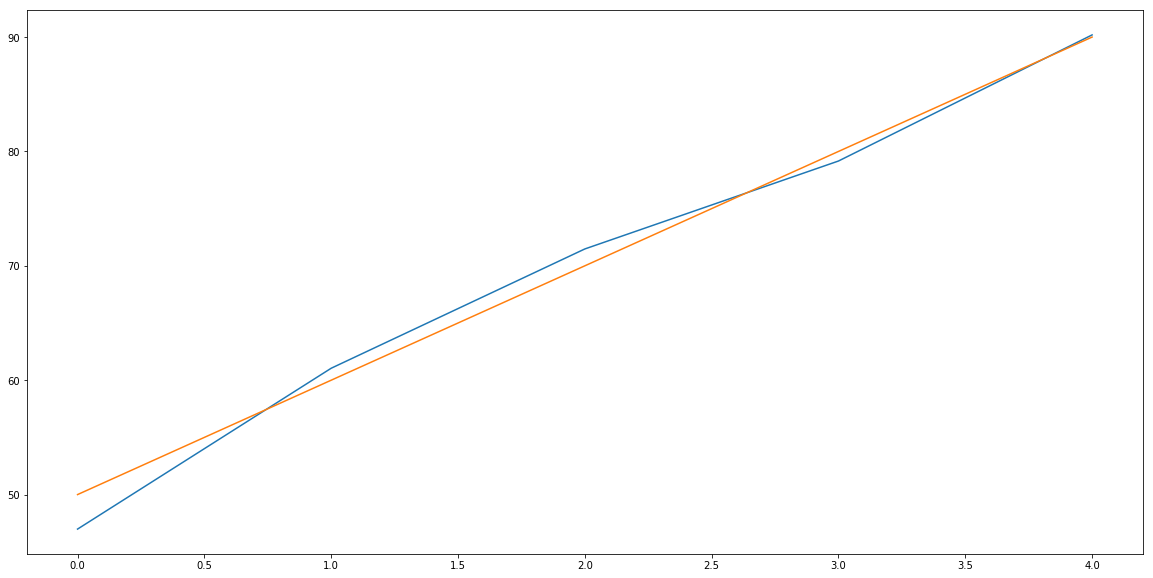

In [222]:
plt.figure(figsize=(20,10))
plt.plot(y_pred)
plt.plot(y)